## `+` Import Libraries

In [70]:
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Flatten, Dropout, BatchNormalization, Conv2D , MaxPooling2D, AveragePooling2D
from tensorflow.keras import Input
from keras.models import Sequential
import tensorflow as tf
from tensorflow.python.platform import build_info as tf_build_info
import numpy as np


## `+` Load & Preprocess CIFAR 10 Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### Preview the Images

<ipython-input-67-5ad3dde048b4>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


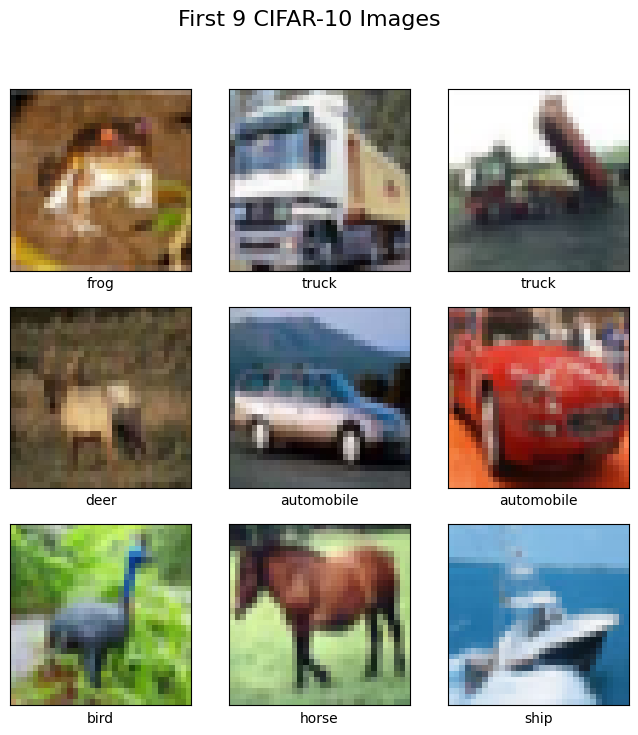

In [67]:
# plot first few images

# CIFAR-10 label names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 9 images
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.suptitle('First 9 CIFAR-10 Images', fontsize=16)
plt.show()


### Feature Rescaling

In [6]:
# Rescale Input
X_train =(X_train / 255.)
X_test  =(X_test / 255.)

In [7]:
X_train, X_test


(array([[[[0.23137255, 0.24313725, 0.24705882],
          [0.16862745, 0.18039216, 0.17647059],
          [0.19607843, 0.18823529, 0.16862745],
          ...,
          [0.61960784, 0.51764706, 0.42352941],
          [0.59607843, 0.49019608, 0.4       ],
          [0.58039216, 0.48627451, 0.40392157]],
 
         [[0.0627451 , 0.07843137, 0.07843137],
          [0.        , 0.        , 0.        ],
          [0.07058824, 0.03137255, 0.        ],
          ...,
          [0.48235294, 0.34509804, 0.21568627],
          [0.46666667, 0.3254902 , 0.19607843],
          [0.47843137, 0.34117647, 0.22352941]],
 
         [[0.09803922, 0.09411765, 0.08235294],
          [0.0627451 , 0.02745098, 0.        ],
          [0.19215686, 0.10588235, 0.03137255],
          ...,
          [0.4627451 , 0.32941176, 0.19607843],
          [0.47058824, 0.32941176, 0.19607843],
          [0.42745098, 0.28627451, 0.16470588]],
 
         ...,
 
         [[0.81568627, 0.66666667, 0.37647059],
          [0.78823

## `+` Set Global Parameters

In [8]:
# Hyperparameters
BATCH_SIZE  = 50
NUM_CLASSES = 10
EPOCHS      = 64
seed        = 88

## `i` Trial no. 1

### Model Training

In [9]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,338 (778.66 KB)

 Trainable params: 199,210 (778.16 KB)

 Non-trainable params: 128 (512.00 B)

### Model Evaluation

In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3066 - loss: 1.9573 - val_accuracy: 0.3486 - val_loss: 1.8086
Epoch 2/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4089 - loss: 1.6563 - val_accuracy: 0.3893 - val_loss: 1.7964
Epoch 3/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4416 - loss: 1.5846 - val_accuracy: 0.4231 - val_loss: 1.6616
Epoch 4/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4608 - loss: 1.5260 - val_accuracy: 0.3877 - val_loss: 1.7328
Epoch 5/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4711 - loss: 1.4820 - val_accuracy: 0.4229 - val_loss: 1.6230
Epoch 6/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4928 - loss: 1.4379 - val_accuracy: 0.4514 - val_loss: 1.5329
Epoch 7/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4992 - loss: 1.4108 - val_accuracy: 0.4435 - val_loss: 1.5944
Epoch 8/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5092 - loss: 1.3748 - val_accuracy: 0.

In [13]:
train_loss , train_accuracy =model.evaluate(X_train, y_train)
test_loss , test_accuracy =model.evaluate(X_test, y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5728 - loss: 1.2088
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4273 - loss: 1.8933
Train Accuracy: 0.5467600226402283
Test Accuracy: 0.42559999227523804


In [14]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Result Visualization

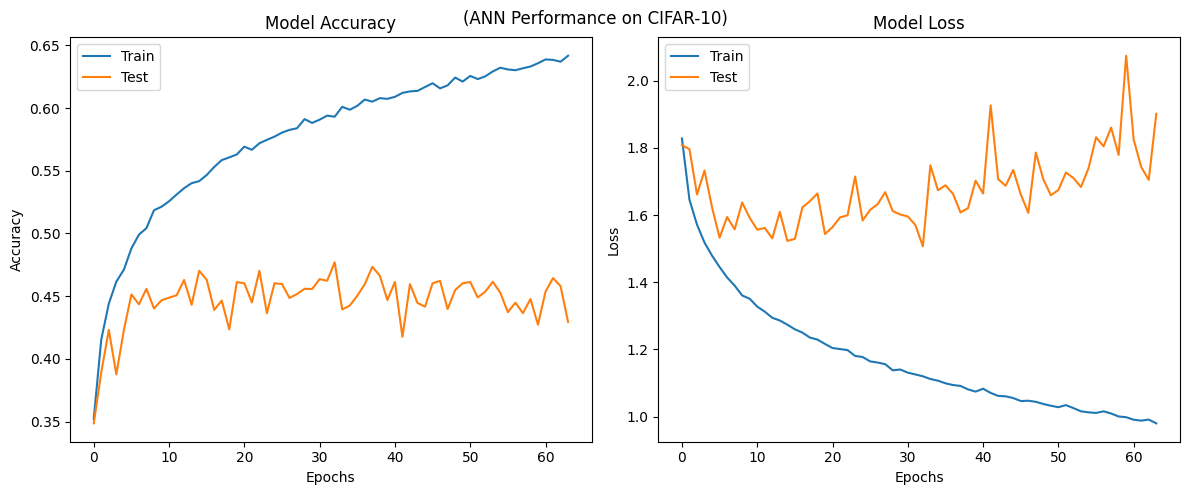

In [103]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy subplot
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'])

# Loss subplot
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'])

# Adjust layout and show
plt.tight_layout()
fig.suptitle('(ANN Performance on CIFAR-10)')
plt.show()

## `ii` Trial no. 2

### Model Training

In [23]:
model2 = Sequential()
model2.add(Input(shape=(32, 32, 3)))
model2.add(Flatten())
model2.add(Dense(1024))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(NUM_CLASSES, activation='softmax'))
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,848,778 (14.68 MB)

 Trainable params: 3,846,730 (14.67 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [24]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2782 - loss: 1.9912 - val_accuracy: 0.3337 - val_loss: 1.8535
Epoch 2/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4056 - loss: 1.6897 - val_accuracy: 0.4005 - val_loss: 1.6675
Epoch 3/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4435 - loss: 1.5932 - val_accuracy: 0.4283 - val_loss: 1.6099
Epoch 4/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4769 - loss: 1.4948 - val_accuracy: 0.4308 - val_loss: 1.6053
Epoch 5/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5046 - loss: 1.4084 - val_accuracy: 0.4079 - val_loss: 1.6884
Epoch 6/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5228 - loss: 1.3481 - val_accuracy: 0.4642 - val_loss: 1.5257
Epoch 7/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5430 - loss: 1.2951 - val_accuracy: 0.4488 - val_loss: 1.5623
Epoch 8/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5610 - loss: 1.2413 - val_accuracy: 0.

### Model Evaluation

In [25]:
train_loss , train_accuracy =model2.evaluate(X_train, y_train)
test_loss , test_accuracy =model2.evaluate(X_test, y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8763 - loss: 0.4052
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5162 - loss: 2.4924
Train Accuracy: 0.8113200068473816
Test Accuracy: 0.5130000114440918


In [26]:
history2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Result Visualization

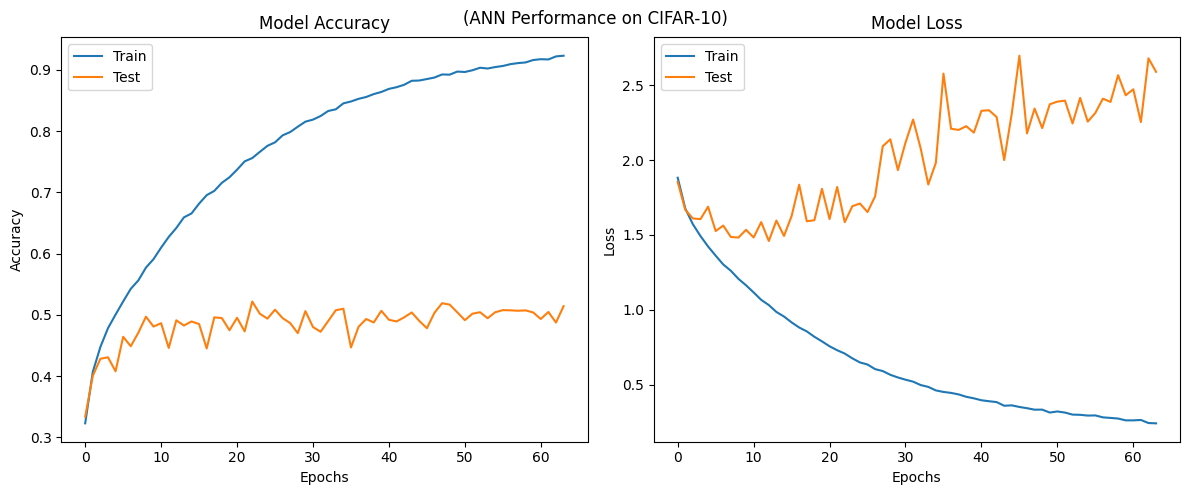

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy subplot
axs[0].plot(history2.history['accuracy'])
axs[0].plot(history2.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'])

# Loss subplot
axs[1].plot(history2.history['loss'])
axs[1].plot(history2.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'])

# Adjust layout and show
plt.tight_layout()
fig.suptitle('(ANN Performance on CIFAR-10)')
plt.show()

------------------------------

# Transfer Learning


## `i` Trial no. 1

### ResNet Model Training

In [41]:
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.vgg19 import VGG19

In [42]:
pre_trained = ResNet50V2(weights='imagenet', include_top=False, pooling = 'avg' )
for layer in pre_trained.layers:
    layer.trainable = False
pre_trained.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, None, None, 64) │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, None, None, 64) │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, None, None, 64) │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv  

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [43]:
model3 = Sequential()
model3.add(Input(shape=(32, 32, 3)))
model3.add(pre_trained)
model3.add(Dense(10,activation='softmax'))
model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)              │ (None, 2048)                │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,585,290 (89.97 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

In [44]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.2579 - loss: 2.1064 - val_accuracy: 0.3498 - val_loss: 1.9169
Epoch 2/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.3664 - loss: 1.8579 - val_accuracy: 0.3651 - val_loss: 1.8617
Epoch 3/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3924 - loss: 1.7812 - val_accuracy: 0.3744 - val_loss: 1.8387
Epoch 4/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4017 - loss: 1.7398 - val_accuracy: 0.3768 - val_loss: 1.8247
Epoch 5/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4105 - loss: 1.7123 - val_accuracy: 0.3809 - val_loss: 1.8183
Epoch 6/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4177 - loss: 1.6956 - val_accuracy: 0.3808 - val_loss: 1.8134
Epoch 7/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4160 - loss: 1.6858 - val_accuracy: 0.3840 - val_loss: 1.8112
Epoch 8/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.4239 - loss: 1.6692 - val_a

### Model Evaluation

In [45]:
train_loss , train_accuracy =model3.evaluate(X_train, y_train)
test_loss , test_accuracy =model3.evaluate(X_test, y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.4674 - loss: 1.5283
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3934 - loss: 1.9358
Train Accuracy: 0.45249998569488525
Test Accuracy: 0.38580000400543213


### Result Visualization

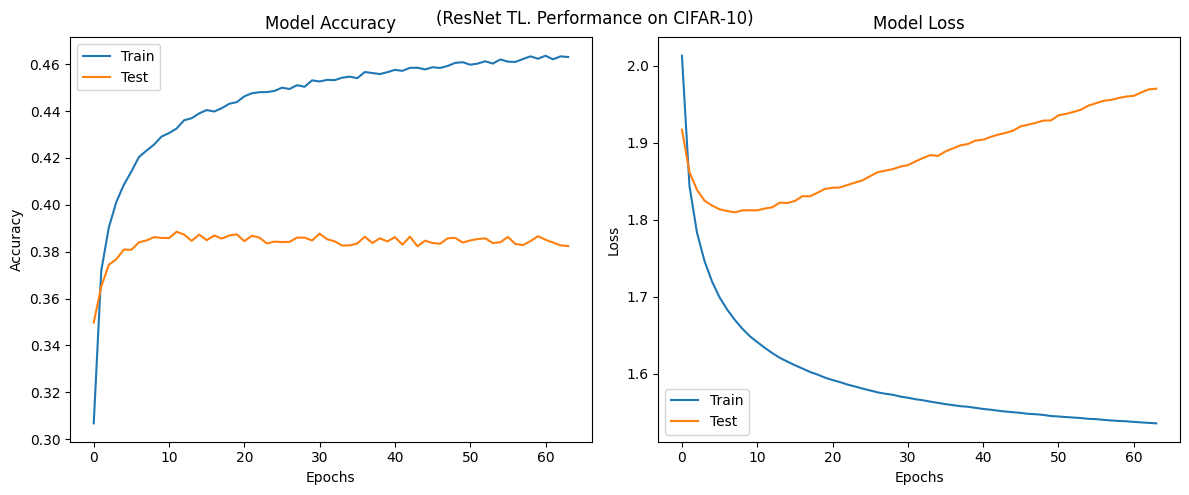

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy subplot
axs[0].plot(history3.history['accuracy'])
axs[0].plot(history3.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'])

# Loss subplot
axs[1].plot(history3.history['loss'])
axs[1].plot(history3.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'])

# Adjust layout and show
plt.tight_layout()
fig.suptitle('(ResNet TL. Performance on CIFAR-10)')
plt.show()

## `ii` Trial no. 2

### VGG19 Model Training

In [46]:
pre_trained2 = VGG19(weights='imagenet', include_top=False, pooling = 'max' )
for layer in pre_trained2.layers:
    layer.trainable = False
pre_trained2.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [47]:
model4 = Sequential()
model4.add(Input(shape=(32, 32, 3)))
model4.add(pre_trained2)
model4.add(Dense(10,activation='softmax'))
model4.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 512)                 │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,029,514 (76.41 MB)

 Trainable params: 5,130 (20.04 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [48]:
model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.3692 - loss: 1.8276 - val_accuracy: 0.4969 - val_loss: 1.4525
Epoch 2/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5109 - loss: 1.4250 - val_accuracy: 0.5186 - val_loss: 1.3700
Epoch 3/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5344 - loss: 1.3483 - val_accuracy: 0.5343 - val_loss: 1.3239
Epoch 4/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.5492 - loss: 1.3002 - val_accuracy: 0.5452 - val_loss: 1.3033
Epoch 5/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.5576 - loss: 1.2793 - val_accuracy: 0.5512 - val_loss: 1.2773
Epoch 6/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5679 - loss: 1.2511 - val_accuracy: 0.5569 - val_loss: 1.2703
Epoch 7/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5703 - loss: 1.2484 - val_accuracy: 0.5607 - val_loss: 1.2577
Epoch 8/64
800/800 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5745 - loss: 1.2289 - 

### Model Evaluation

In [49]:
train_loss , train_accuracy =model4.evaluate(X_train, y_train)
test_loss , test_accuracy =model4.evaluate(X_test, y_test)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6070 - loss: 1.1213
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5765 - loss: 1.2267
Train Accuracy: 0.601360023021698
Test Accuracy: 0.576200008392334


### Result Visualization

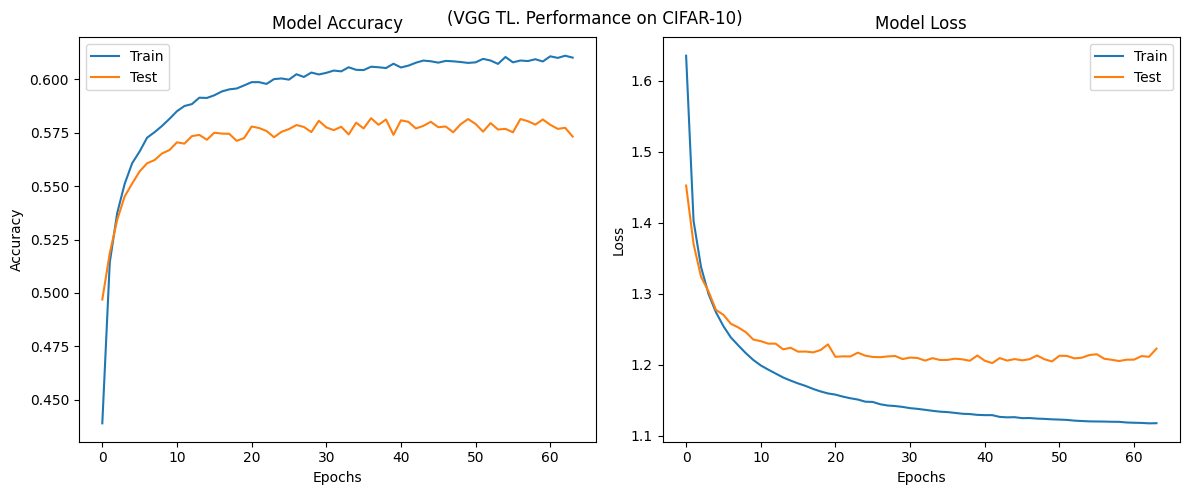

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy subplot
axs[0].plot(history4.history['accuracy'])
axs[0].plot(history4.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'])

# Loss subplot
axs[1].plot(history4.history['loss'])
axs[1].plot(history4.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'])

# Adjust layout and show
plt.tight_layout()
fig.suptitle('(VGG TL. Performance on CIFAR-10)')
plt.show()

---

## `+` Load MNIST Dataset

In [77]:
(X_train2, y_train2), (X_test2, y_test2) = keras.datasets.mnist.load_data()

In [78]:
print(f"Shape of X_train: {X_train2.shape}")
print(f"Shape of y_train: {y_train2.shape}")
print(f"Shape of X_test: {X_test2.shape}")
print(f"Shape of y_test: {y_test2.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


### Preview the Images

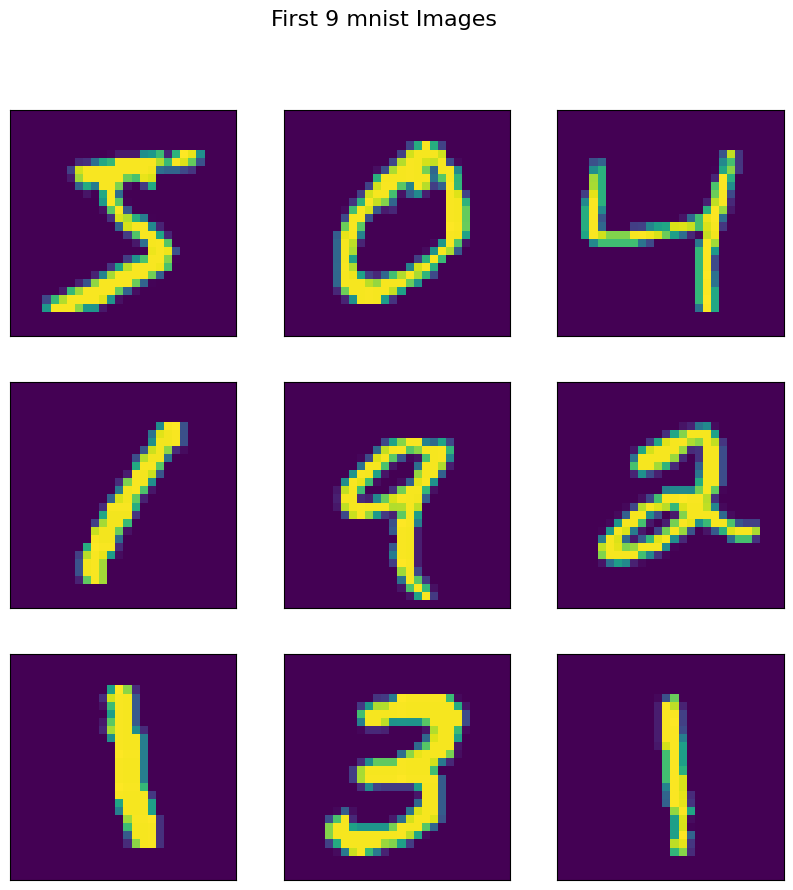

In [56]:
# plot first few images

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train2[i])
plt.suptitle('First 9 mnist Images', fontsize=16)
plt.show()


### Rescale Independent Features

In [80]:
# Rescale the Input
X_train2 = (X_train2 / 255.)
X_test2 = (X_test2 / 255.)

## `+` Set Global Parameters

In [58]:
# Hyperparameters
BATCH_SIZE  = 50
NUM_CLASSES = 10
EPOCHS      = 64
seed        = 88

## `i` ANN Trials

### Trial no. 1

#### Model Training

In [59]:
model5 = Sequential()
model5.add(Input(shape=(28, 28)))
model5.add(Flatten())
model5.add(Dense(128))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dense(64, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(NUM_CLASSES, activation='softmax'))
model5.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,658 (436.16 KB)

 Trainable params: 111,402 (435.16 KB)

 Non-trainable params: 256 (1.00 KB)

In [60]:
model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history5 = model5.fit(X_train2, y_train2, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8123 - loss: 0.6062 - val_accuracy: 0.9556 - val_loss: 0.1464
Epoch 2/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9523 - loss: 0.1689 - val_accuracy: 0.9657 - val_loss: 0.1204
Epoch 3/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9664 - loss: 0.1192 - val_accuracy: 0.9672 - val_loss: 0.1137
Epoch 4/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9744 - loss: 0.0896 - val_accuracy: 0.9734 - val_loss: 0.0923
Epoch 5/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9770 - loss: 0.0761 - val_accuracy: 0.9731 - val_loss: 0.0997
Epoch 6/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9799 - loss: 0.0698 - val_accuracy: 0.9746 - val_loss: 0.0956
Epoch 7/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9835 - loss: 0.0554 - val_accuracy: 0.9754 - val_loss: 0.0991
Epoch 8/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9850 - loss: 0.0511 - val_accuracy: 0.

#### Model Ealuation

In [61]:
train_loss , train_accuracy =model5.evaluate(X_train2, y_train2)
test_loss , test_accuracy =model5.evaluate(X_test2, y_test2)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9989 - loss: 0.0053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.1586
Train Accuracy: 0.9951500296592712
Test Accuracy: 0.98089998960495


#### Result Visualization

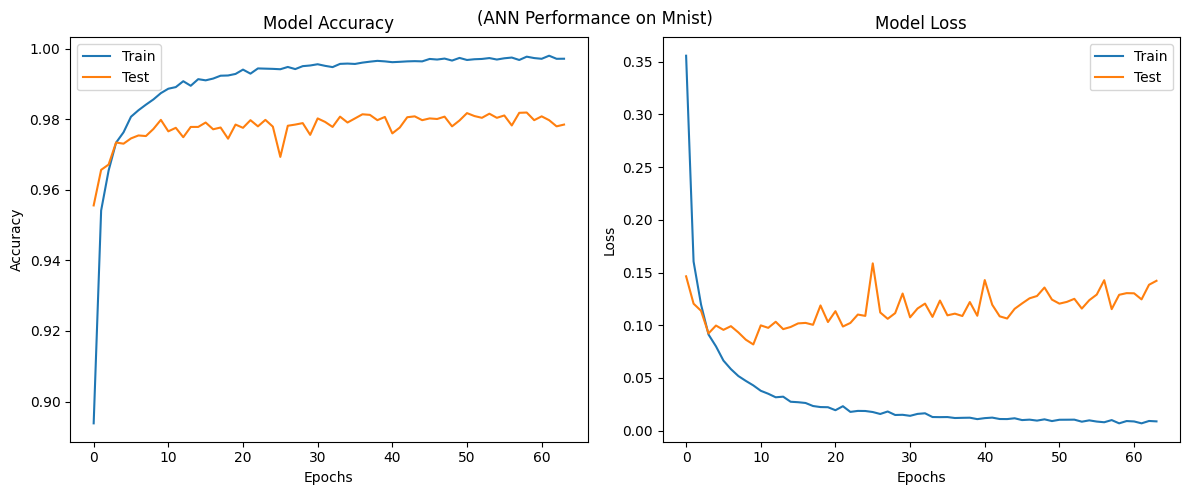

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy subplot
axs[0].plot(history5.history['accuracy'])
axs[0].plot(history5.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'])

# Loss subplot
axs[1].plot(history5.history['loss'])
axs[1].plot(history5.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'])

# Adjust layout and show
plt.tight_layout()
fig.suptitle('(ANN Performance on Mnist)')
plt.show()

### Trial no. 2

#### Model Training

In [63]:
model6 = Sequential()
model6.add(Input(shape=(28, 28)))
model6.add(Flatten())
model6.add(Dense(1024))
model6.add(BatchNormalization())
model6.add(Activation('relu'))
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(NUM_CLASSES, activation='softmax'))
model6.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,507,626 (5.75 MB)

 Trainable params: 1,505,578 (5.74 MB)

 Non-trainable params: 2,048 (8.00 KB)

In [64]:
model6.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history6 = model6.fit(X_train2, y_train2, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8115 - loss: 0.6016 - val_accuracy: 0.9601 - val_loss: 0.1480
Epoch 2/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9497 - loss: 0.1927 - val_accuracy: 0.9643 - val_loss: 0.1289
Epoch 3/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9643 - loss: 0.1422 - val_accuracy: 0.9698 - val_loss: 0.1127
Epoch 4/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9697 - loss: 0.1155 - val_accuracy: 0.9729 - val_loss: 0.1062
Epoch 5/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9760 - loss: 0.0920 - val_accuracy: 0.9743 - val_loss: 0.1075
Epoch 6/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9790 - loss: 0.0832 - val_accuracy: 0.9708 - val_loss: 0.1227
Epoch 7/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9818 - loss: 0.0719 - val_accuracy: 0.9755 - val_loss: 0.1174
Epoch 8/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9840 - loss: 0.0639 - val_accuracy: 0.

#### Model Evaluation

In [65]:
train_loss , train_accuracy =model6.evaluate(X_train2, y_train2)
test_loss , test_accuracy =model6.evaluate(X_test2, y_test2)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9984 - loss: 0.0077
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9769 - loss: 0.1634
Train Accuracy: 0.9955666661262512
Test Accuracy: 0.9821000099182129


#### Result Visualization

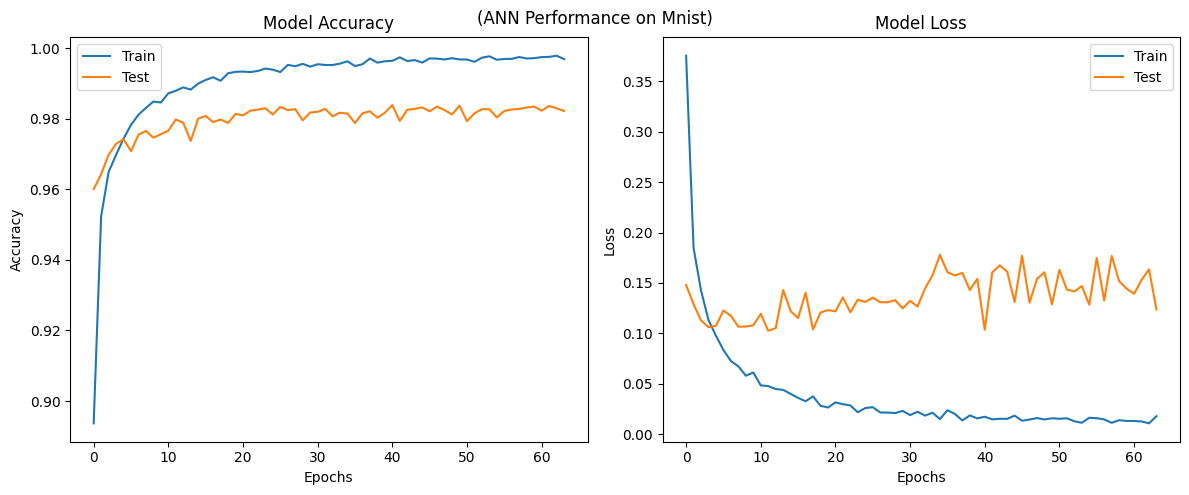

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy subplot
axs[0].plot(history6.history['accuracy'])
axs[0].plot(history6.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'])

# Loss subplot
axs[1].plot(history6.history['loss'])
axs[1].plot(history6.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'])

# Adjust layout and show
plt.tight_layout()
fig.suptitle('(ANN Performance on Mnist)')
plt.show()

## `ii` CNN Trials

### Trial no. 1

#### Datasets Reshaping

In [81]:
X_train2 = X_train2.reshape(-1, 28, 28, 1)
X_test2 = X_test2.reshape(-1, 28, 28, 1)
X_train2.shape, X_test2.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

#### Model Training

In [82]:
model7 = Sequential()
model7.add(Input(shape=(28, 28, 1)))
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D((2, 2)))
model7.add(Conv2D(32, (3, 3), activation='relu'))
model7.add(MaxPooling2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(128))
model7.add(BatchNormalization())
model7.add(Activation('relu'))
model7.add(Dense(64, activation='relu'))
model7.add(Dense(32, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(NUM_CLASSES, activation='softmax'))
model7.summary()



Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,810 (518.79 KB)

 Trainable params: 132,554 (517.79 KB)

 Non-trainable params: 256 (1.00 KB)

In [83]:
model7.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history7 = model7.fit(X_train2, y_train2, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8863 - loss: 0.3864 - val_accuracy: 0.9812 - val_loss: 0.0653
Epoch 2/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9811 - loss: 0.0666 - val_accuracy: 0.9831 - val_loss: 0.0583
Epoch 3/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9862 - loss: 0.0471 - val_accuracy: 0.9875 - val_loss: 0.0433
Epoch 4/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9895 - loss: 0.0355 - val_accuracy: 0.9867 - val_loss: 0.0479
Epoch 5/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9922 - loss: 0.0287 - val_accuracy: 0.9846 - val_loss: 0.0598
Epoch 6/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9927 - loss: 0.0241 - val_accuracy: 0.9884 - val_loss: 0.0447
Epoch 7/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9936 - loss: 0.0209 - val_accuracy: 0.9898 - val_loss: 0.0422
Epoch 8/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9946 - loss: 0.0176 - val_accuracy: 

#### Model Evaluation

In [84]:
train_loss , train_accuracy =model7.evaluate(X_train2, y_train2)
test_loss , test_accuracy =model7.evaluate(X_test2, y_test2)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9998 - loss: 0.0014
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9913 - loss: 0.0559
Train Accuracy: 0.9982666373252869
Test Accuracy: 0.9932000041007996


#### Result Visualization

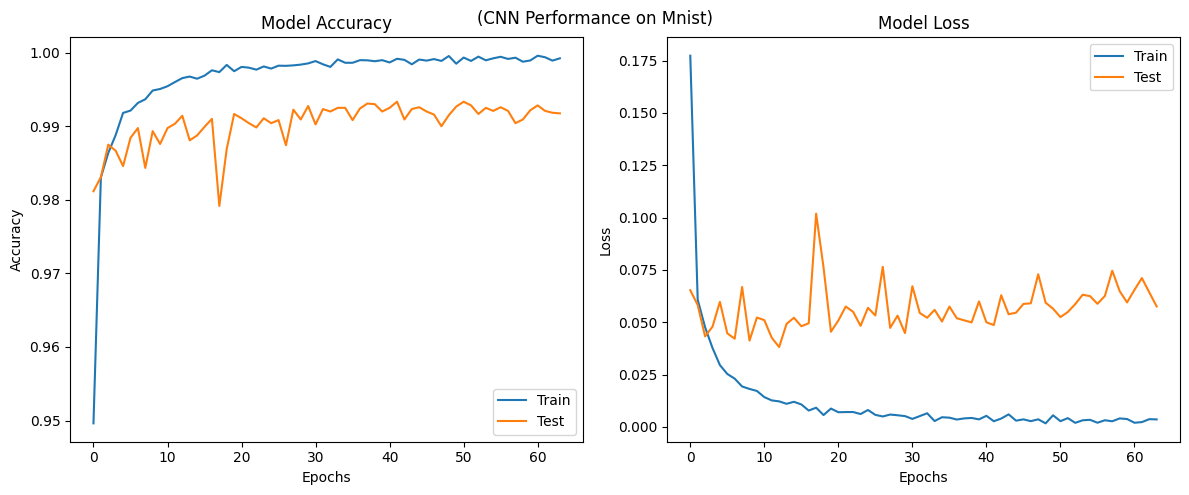

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy subplot
axs[0].plot(history7.history['accuracy'])
axs[0].plot(history7.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'])

# Loss subplot
axs[1].plot(history7.history['loss'])
axs[1].plot(history7.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'])

# Adjust layout and show
plt.tight_layout()
fig.suptitle('(CNN Performance on Mnist)')
plt.show()

### Trial no. 2

#### Model Training

In [87]:
model8 = Sequential()
model8.add(Input(shape=(28, 28, 1)))
model8.add(Conv2D(32, (3, 3), activation='relu'))
model8.add(MaxPooling2D((2, 2)))
model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D((2, 2)))
model8.add(Flatten())
model8.add(Dense(64 , activation='relu'))
model8.add(Dense(32, activation='relu'))
model8.add(Dense(NUM_CLASSES, activation='softmax'))
model8.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,690 (483.16 KB)

 Trainable params: 123,690 (483.16 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model8.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history8 = model8.fit(X_train2, y_train2, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2)

Epoch 1/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8511 - loss: 0.4595 - val_accuracy: 0.9753 - val_loss: 0.0725
Epoch 2/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9784 - loss: 0.0686 - val_accuracy: 0.9808 - val_loss: 0.0589
Epoch 3/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9867 - loss: 0.0428 - val_accuracy: 0.9841 - val_loss: 0.0573
Epoch 4/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9900 - loss: 0.0314 - val_accuracy: 0.9842 - val_loss: 0.0552
Epoch 5/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9915 - loss: 0.0256 - val_accuracy: 0.9837 - val_loss: 0.0569
Epoch 6/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9878 - val_loss: 0.0435
Epoch 7/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9954 - loss: 0.0158 - val_accuracy: 0.9862 - val_loss: 0.0480
Epoch 8/64
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.

#### Model Evaluation

In [89]:
train_loss , train_accuracy =model8.evaluate(X_train2, y_train2)
test_loss , test_accuracy =model8.evaluate(X_test2, y_test2)
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9998 - loss: 0.0023
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9901 - loss: 0.1016
Train Accuracy: 0.9984666705131531
Test Accuracy: 0.9926999807357788


#### Result Visualization

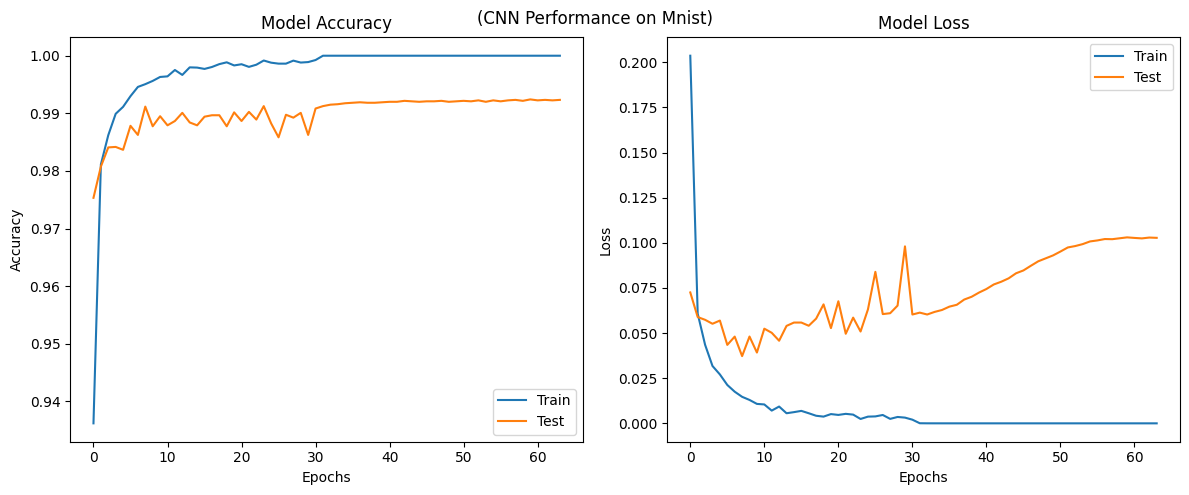

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Accuracy subplot
axs[0].plot(history8.history['accuracy'])
axs[0].plot(history8.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Train', 'Test'])

# Loss subplot
axs[1].plot(history8.history['loss'])
axs[1].plot(history8.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Train', 'Test'])

# Adjust layout and show
plt.tight_layout()
fig.suptitle('(CNN Performance on Mnist)')
plt.show()

----------------------------------------------
